In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, PolynomialFeatures
# local
import wrangle as w
import explore as e
import modeling as m

In [2]:
# 52,441 rows to 50,041, drop less than 5%

In [3]:
df = w.get_zillow()
df

,parcelid,id,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,id.1,logerror,transactiondate
0,17173851,787,NaN,NaN,NaN,2.0,4.0,NaN,NaN,2.0,...,64712.0,2016.0,17519.0,781.00,NaN,NaN,6.111004e+13,389.0,0.088469,2017-01-03
1,10821119,1702,NaN,NaN,NaN,2.0,2.0,NaN,6.0,2.0,...,381638.0,2016.0,274127.0,4692.27,NaN,NaN,6.037131e+13,402.0,0.025629,2017-01-03
2,11007640,2412,1.0,NaN,NaN,2.0,3.0,NaN,8.0,2.0,...,305307.0,2016.0,160505.0,3887.80,NaN,NaN,6.037106e+13,2699.0,0.020360,2017-01-12
3,11457850,3770,NaN,NaN,NaN,2.0,3.0,NaN,6.0,2.0,...,93146.0,2016.0,54446.0,1246.18,NaN,NaN,6.037276e+13,2229.0,0.054233,2017-01-11
4,12591550,8197,NaN,NaN,NaN,2.0,3.0,NaN,6.0,2.0,...,482242.0,2016.0,385591.0,6098.62,NaN,NaN,6.037544e+13,3038.0,-0.016170,2017-01-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52436,12885754,2976765,NaN,NaN,NaN,1.0,3.0,NaN,4.0,1.0,...,200214.0,2016.0,106817.0,2629.33,NaN,NaN,6.037403e+13,42657.0,0.515289,2017-06-01
52437,13869000,2977815,NaN,NaN,NaN,2.0,4.0,NaN,NaN,2.0,...,215695.0,2016.0,80652.0,2607.04,NaN,NaN,6.059002e+13,32297.0,0.009512,2017-05-02
52438,13890509,2977914,NaN,NaN,NaN,4.0,3.0,NaN,NaN,4.0,...,1389962.0,2016.0,1118935.0,14935.72,NaN,NaN,6.059063e+13,28537.0,-0.031048,2017-04-21
52439,17246810,2980979,NaN,NaN,NaN,2.5,3.0,NaN,NaN,2.5,...,403678.0,2016.0,201839.0,4880.90,NaN,NaN,6.111008e+13,8396.0,-0.031665,2017-02-07


In [4]:
df = w.prep4ex_zillow(df)
df

,parcelid,year,baths,threequarterbathnbr,beds,roomcnt,fireplacecnt,garagecarcnt,garagetotalsqft,hashottuborspa,...,rawcensustractandblock,county,regionidcity,regionidzip,latitude,longitude,transactiondate,trx_month,trx_day,prop_value
0,17173851,1952,2.0,0.0,4,6.0,1.0,0.0,0.0,0.0,...,6.111004e+07,Ventura,47198.0,97109.0,34153345.0,-119194015.0,2017-01-03,1,3,64712
1,10821119,1952,2.0,0.0,2,0.0,0.0,0.0,0.0,0.0,...,6.037131e+07,LA,12447.0,96415.0,34217763.0,-118504217.0,2017-01-03,1,3,381638
2,11007640,1976,2.0,0.0,3,0.0,0.0,0.0,0.0,0.0,...,6.037106e+07,LA,12447.0,96368.0,34326995.0,-118426172.0,2017-01-12,1,12,305307
3,11457850,1941,2.0,0.0,3,0.0,0.0,0.0,0.0,0.0,...,6.037276e+07,LA,12447.0,96026.0,33962085.0,-118393253.0,2017-01-11,1,11,93146
4,12591550,1959,2.0,0.0,3,0.0,0.0,0.0,0.0,0.0,...,6.037544e+07,LA,118878.0,96160.0,33833583.0,-118295434.0,2017-01-13,1,13,482242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52436,12885754,1948,1.0,0.0,3,0.0,0.0,0.0,0.0,0.0,...,6.037403e+07,LA,20008.0,96506.0,34041973.0,-117761243.0,2017-06-01,6,1,200214
52437,13869000,1976,2.0,0.0,4,7.0,0.0,2.0,454.0,0.0,...,6.059002e+07,Orange,24812.0,97041.0,33868442.0,-117974576.0,2017-05-02,5,2,215695
52438,13890509,2001,4.0,0.0,3,5.0,0.0,3.0,864.0,0.0,...,6.059063e+07,Orange,53571.0,96981.0,33624412.0,-117921232.0,2017-04-21,4,21,1389962
52439,17246810,1986,2.5,1.0,3,5.0,1.0,2.0,456.0,0.0,...,6.111008e+07,Ventura,27110.0,97118.0,34253728.0,-118732673.0,2017-02-07,2,7,403678


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50041 entries, 0 to 52440
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   parcelid                50041 non-null  int64  
 1   year                    50041 non-null  int32  
 2   baths                   50041 non-null  float64
 3   threequarterbathnbr     50041 non-null  float64
 4   beds                    50041 non-null  int32  
 5   roomcnt                 50041 non-null  float64
 6   fireplacecnt            50041 non-null  float64
 7   garagecarcnt            50041 non-null  float64
 8   garagetotalsqft         50041 non-null  float64
 9   hashottuborspa          50041 non-null  float64
 10  pools                   50041 non-null  float64
 11  spa_or_hottub           50041 non-null  float64
 12  pool_w_spa_hottub       50041 non-null  float64
 13  pool_wo_hottub          50041 non-null  float64
 14  poolsizesum             50041 non-null

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
parcelid,50041.0,1.296674e+07,2.200942e+06,1.071186e+07,1.151108e+07,1.260022e+07,1.413062e+07,1.629608e+08
year,50041.0,1.962789e+03,2.272327e+01,1.878000e+03,1.950000e+03,1.960000e+03,1.978000e+03,2.016000e+03
baths,50041.0,2.235017e+00,9.106005e-01,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,1.000000e+01
threequarterbathnbr,50041.0,1.273156e-01,3.376777e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00
beds,50041.0,3.273676e+00,9.093507e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,1.100000e+01
roomcnt,50041.0,1.922204e+00,3.153140e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,1.400000e+01
fireplacecnt,50041.0,1.687216e-01,4.527755e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
garagecarcnt,50041.0,6.677325e-01,9.644188e-01,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,1.400000e+01
garagetotalsqft,50041.0,1.693798e+02,2.478019e+02,0.000000e+00,0.000000e+00,0.000000e+00,4.300000e+02,4.251000e+03
hashottuborspa,50041.0,2.625847e-02,1.599046e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


## MVP Time

In [7]:
df = df[['baths','beds','area','prop_value']]
df

,baths,beds,area,prop_value
0,2.0,4,1848,64712
1,2.0,2,1430,381638
2,2.0,3,1572,305307
3,2.0,3,1412,93146
4,2.0,3,1352,482242
...,...,...,...,...
52436,1.0,3,1021,200214
52437,2.0,4,1554,215695
52438,4.0,3,2880,1389962
52439,2.5,3,1376,403678


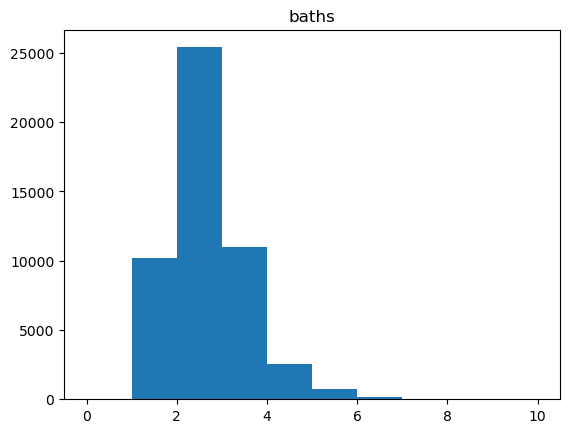

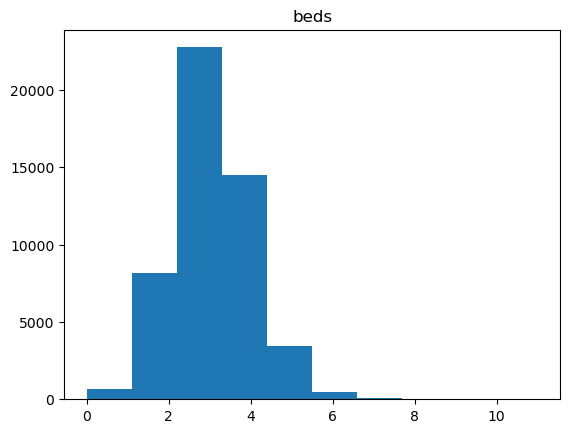

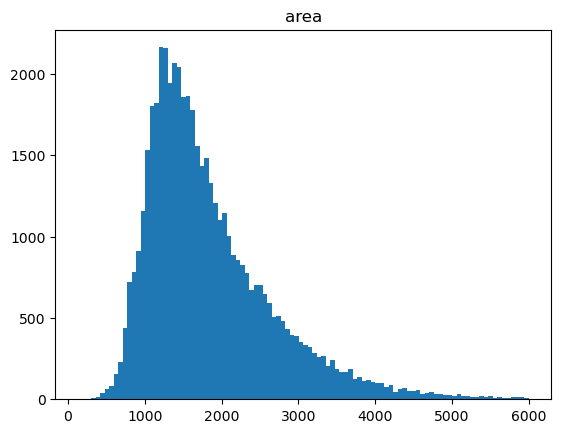

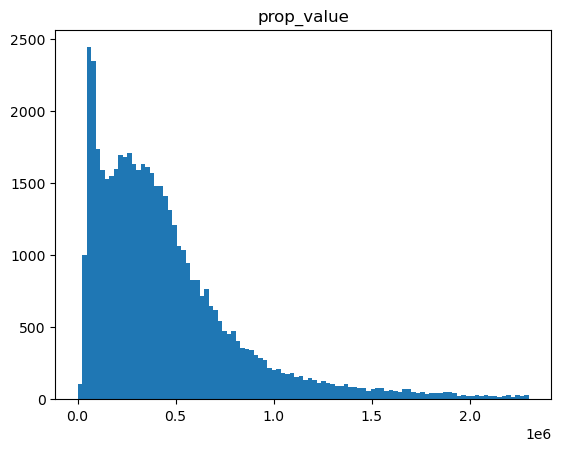

In [8]:
for col in ['baths','beds']:
    plt.hist(df[col])
    plt.title(col)
    plt.show()
for col in ['area','prop_value']:
    plt.hist(df[col],100)
    plt.title(col)
    plt.show()

In [9]:
train,val,test = w.split_data(df)
train

,baths,beds,area,prop_value
27246,3.0,4,3040,1390157
40172,1.0,3,1139,243504
9637,2.0,3,1520,212725
45634,3.5,3,3544,697033
44770,2.5,2,1658,776897
...,...,...,...,...
19966,2.0,4,1728,771473
28576,2.0,3,1800,707681
27858,2.0,3,1326,288821
39221,1.0,2,704,26852


In [10]:
train.describe()

,baths,beds,area,prop_value
count,30024.000000,30024.000000,30024.000000,3.002400e+04
mean,2.235295,3.273981,1845.086331,4.545678e+05
std,0.908653,0.904239,824.102512,3.792402e+05
min,0.000000,0.000000,128.000000,1.000000e+03
25%,2.000000,3.000000,1258.000000,1.879260e+05
50%,2.000000,3.000000,1638.000000,3.635285e+05
75%,3.000000,4.000000,2234.000000,5.954302e+05
max,8.000000,11.000000,5999.000000,2.295000e+06


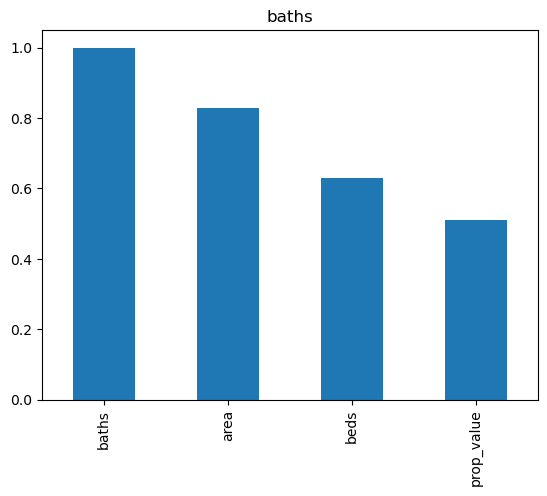

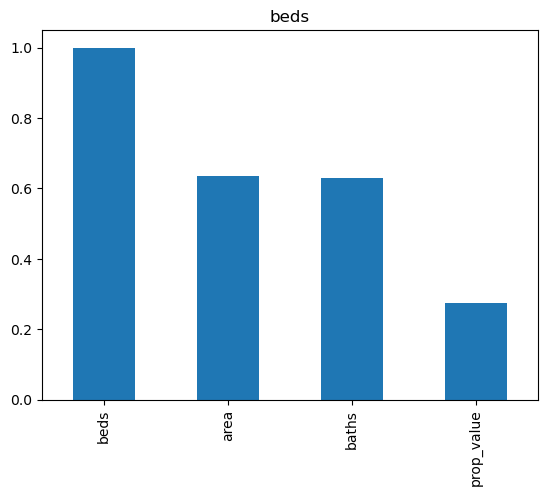

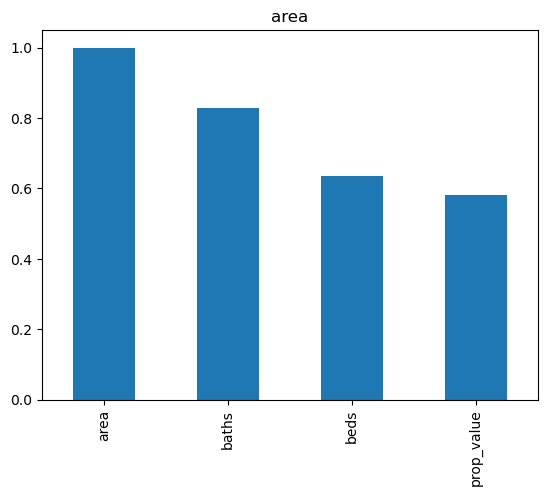

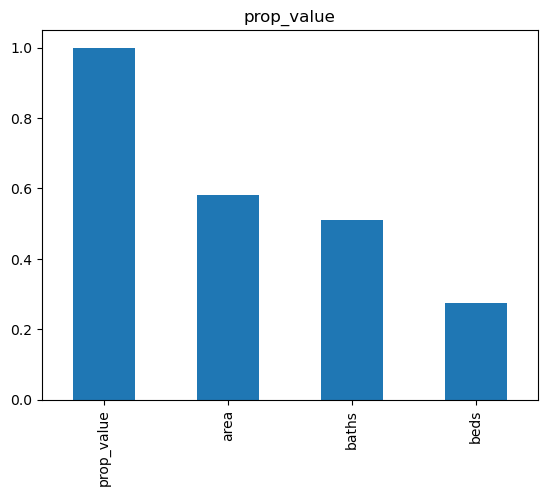

In [11]:
cols = train.columns.to_list()
for col in cols:
    train.corr()[col].sort_values(ascending = False).plot(kind='bar')
    plt.title(col)
    plt.show()

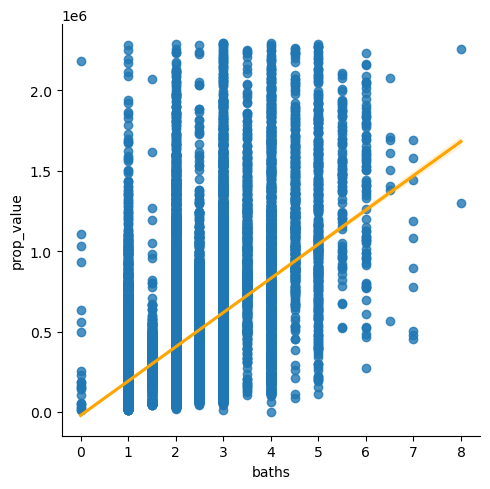

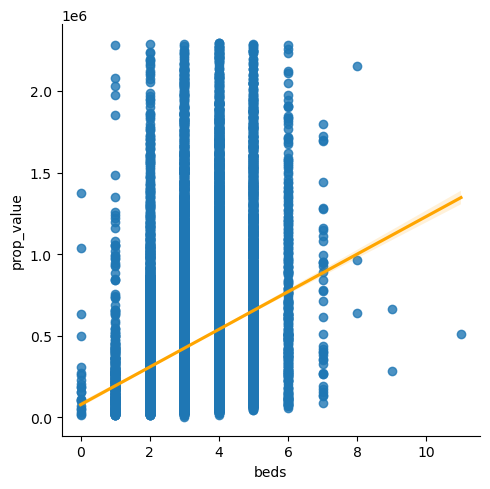

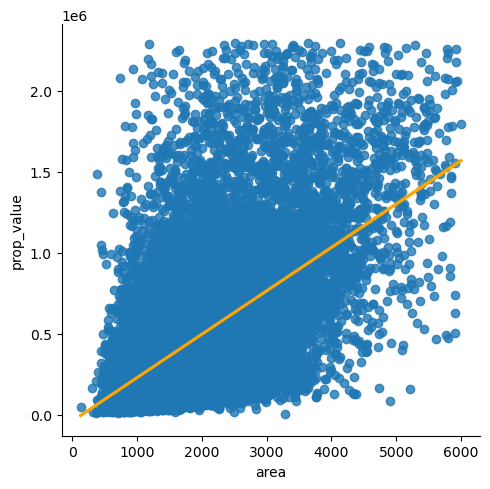

In [12]:
target = 'prop_value'
for i in train.drop(columns=target):
    sns.lmplot(x=i,y=target,data=train,line_kws={'color':'orange'})
    # plt.ylim(0,2_000_000)
    plt.show()

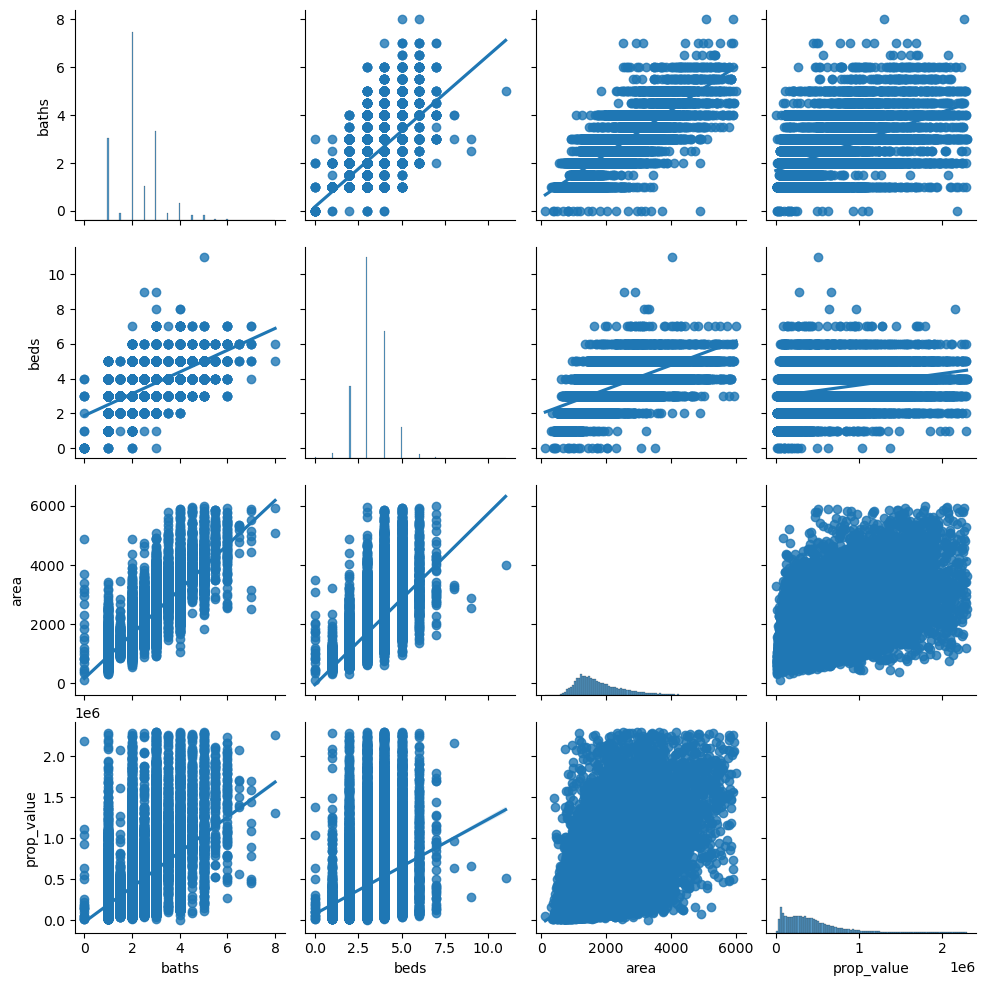

In [13]:
sns.pairplot(data=train,kind='reg')
plt.show()

In [14]:
import itertools
cols = train.columns.to_list()
def pear(train, x, y, alt_hyp='two-sided'):
    r,p = stats.spearmanr(train[x], train[y], alternative=alt_hyp)
    print(f"Spearman's R: {x} and {y}\n", f'r = {r}, p = {p}')
for col in itertools.permutations(cols,2):
    # cont & cont
    pear(train,col[0],col[1])

Spearman's R: baths and beds
 r = 0.6231288617314806, p = 0.0
Spearman's R: baths and area
 r = 0.82615211707249, p = 0.0
Spearman's R: baths and prop_value
 r = 0.46048030704018234, p = 0.0
Spearman's R: beds and baths
 r = 0.6231288617314806, p = 0.0
Spearman's R: beds and area
 r = 0.6587028681127378, p = 0.0
Spearman's R: beds and prop_value
 r = 0.27320005753204185, p = 0.0
Spearman's R: area and baths
 r = 0.8261521170724899, p = 0.0
Spearman's R: area and beds
 r = 0.6587028681127378, p = 0.0
Spearman's R: area and prop_value
 r = 0.5004688811806308, p = 0.0
Spearman's R: prop_value and baths
 r = 0.4604803070401823, p = 0.0
Spearman's R: prop_value and beds
 r = 0.27320005753204185, p = 0.0
Spearman's R: prop_value and area
 r = 0.5004688811806308, p = 0.0


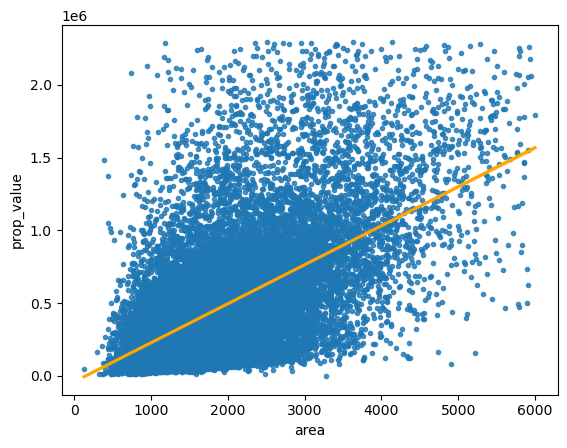

In [15]:
# Does area correlate with prop_value?
# H0 = No correlation
# Ha = Yes correlation
sns.regplot(data=train,x='area',y='prop_value',marker='.',line_kws={'color':'orange'})
plt.show()

In [16]:
pear(train,'area','prop_value')

Spearman's R: area and prop_value
 r = 0.5004688811806308, p = 0.0


In [17]:
# less than alpha = .05
# yes correlation

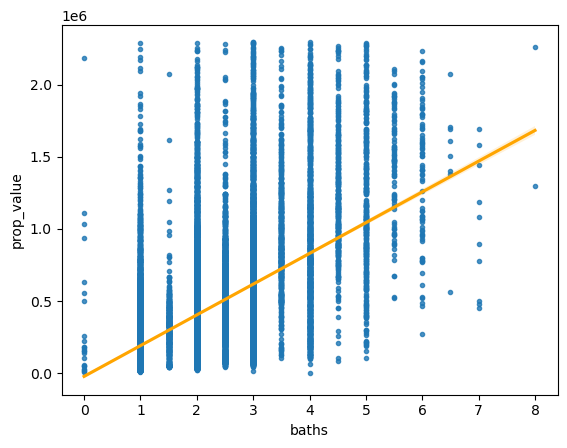

In [18]:
# Does baths correlate with prop_value?
# H0 = No correlation
# Ha = Yes correlation
sns.regplot(data=train,x='baths',y='prop_value',marker='.',line_kws={'color':'orange'})
plt.show()

In [19]:
pear(train,'baths','prop_value')

Spearman's R: baths and prop_value
 r = 0.46048030704018234, p = 0.0


In [20]:
# less than alpha = .05
# yes correlation

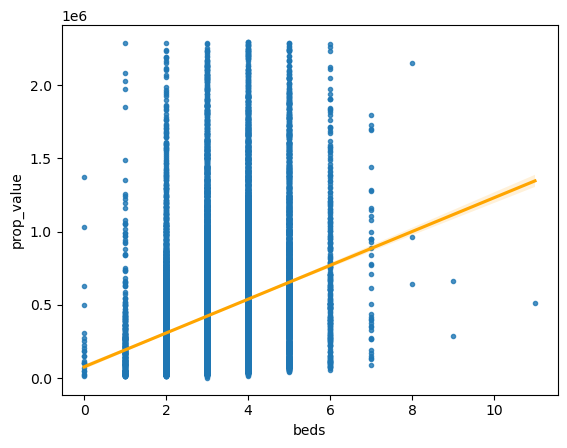

In [21]:
# Does beds correlate with prop_value?
# H0 = No correlation
# Ha = Yes correlation
sns.regplot(data=train,x='beds',y='prop_value',marker='.',line_kws={'color':'orange'})
plt.show()

In [22]:
pear(train,'beds','prop_value')

Spearman's R: beds and prop_value
 r = 0.27320005753204185, p = 0.0


In [23]:
# less than alpha = .05
# yes correlation

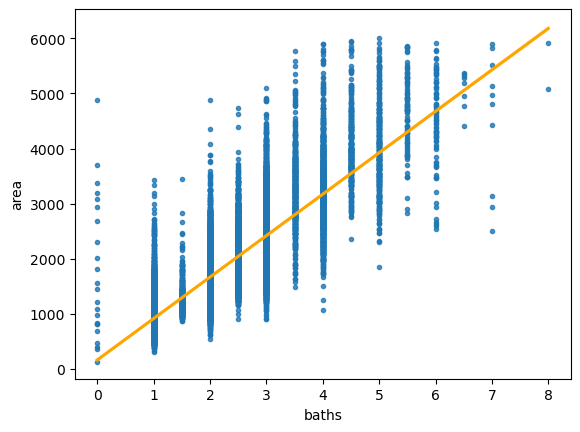

In [24]:
# Does baths correlate with area?
# H0 = No correlation
# Ha = Yes correlation
sns.regplot(data=train,x='baths',y='area',marker='.',line_kws={'color':'orange'})
plt.show()

In [25]:
pear(train,'baths','area')

Spearman's R: baths and area
 r = 0.82615211707249, p = 0.0


In [26]:
# less than alpha = .05
# yes correlation

In [27]:
train = train.assign(rooms=(train.beds+train.baths))
val = val.assign(rooms=(val.beds+val.baths))
test = test.assign(rooms=(test.beds+test.baths))

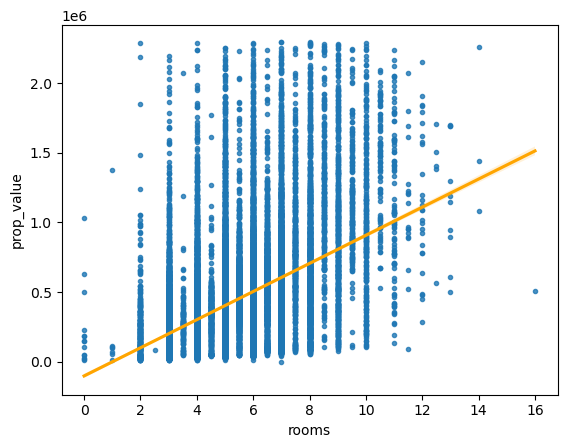

In [28]:
# Does baths correlate with area?
# H0 = No correlation
# Ha = Yes correlation
sns.regplot(data=train,x='rooms',y='prop_value',marker='.',line_kws={'color':'orange'})
plt.show()

In [29]:
pear(train,'rooms','prop_value')

Spearman's R: rooms and prop_value
 r = 0.40092132528313257, p = 0.0


In [30]:
# less than alpha = .05
# yes correlation

In [31]:
train.prop_value.mean()

454567.7524980016

In [32]:
X_train,X_val,X_test = train.drop(columns=['prop_value']),val.drop(columns=['prop_value']),test.drop(columns=['prop_value'])
Xs_train,Xs_val,Xs_test = w.std_zillow(X_train,X_val,X_test)
y_train,y_val,y_test = train[['prop_value']],val[['prop_value']],test[['prop_value']]

In [33]:
y_train.mean()[0]

454567.7524980016

In [34]:
metrics = m.reg_mods(Xs_train,y_train,Xs_val,y_val,features=None,alpha=[1,5,6,7,8,9],degree=[2,3,4,5],power=[1,1.25,1.5,1.75,2])
metrics

c:\tools\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:116: FutureWarning: 'normalize' was deprecated in version 1.2 and will be removed in 1.4. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
c:\tools\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:116: FutureWarning: 'normalize' was deprecated in version 1.2 and will be removed in 1.4. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
c:\tools\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:116: FutureWarning: 'normalize' was deprecated in version 1.2 and will be removed in 1.4. Please leave the no

,model,features,params,rmse_tr,rmse_v,r2_tr,r2_v
0,bl_mean,None,None,379233.862195,369939.797674,0.000000,-0.000659
1,bl_median,None,None,390008.291874,378701.545691,-0.057629,-0.048620
2,LinearRegression,[baths_s],None,326154.936391,323416.502017,0.260337,0.235199
3,LinearRegression,[beds_s],None,364586.763478,357926.721894,0.075754,0.063275
4,LinearRegression,[area_s],None,308329.095192,308037.651829,0.338980,0.306204
...,...,...,...,...,...,...,...
612,TweedieRegressor,"[baths_s, beds_s, area_s, rooms_s]","power=1,alpha=9",308565.687470,311201.718138,0.337965,0.291878
613,TweedieRegressor,"[baths_s, beds_s, area_s, rooms_s]","power=1.25,alpha=9",309869.227269,313241.051781,0.332359,0.282567
614,TweedieRegressor,"[baths_s, beds_s, area_s, rooms_s]","power=1.5,alpha=9",310795.049347,314636.609762,0.328364,0.276160
615,TweedieRegressor,"[baths_s, beds_s, area_s, rooms_s]","power=1.75,alpha=9",309248.473654,308527.233802,0.335032,0.303997


In [35]:
# poly best f=['baths_s', 'area_s', 'rooms_s'], degree=4
# lin reg f=['baths_s', 'beds_s', 'area_s', 'rooms_s']
# lasso f=['beds_s', 'area_s', 'rooms_s'], alpha=9
# tweedie f=['baths_s', 'beds_s', 'area_s'], power=1.75,alpha=7

In [36]:
def metrics_reg(y, yhat):
    """
    send in y_true, y_pred & returns RMSE, R2
    """
    rmse = mean_squared_error(y, yhat, squared=False)
    r2 = r2_score(y, yhat)
    return rmse, r2

def train_val_model(model,X_train,y_train,X_val,y_val):
    if model == 'lr':
        # features
        f=['baths_s', 'beds_s', 'area_s', 'rooms_s']
        # model
        lr = LinearRegression()
        lr.fit(X_train[f],y_train)
        # metrics
        pred_lr_tr = lr.predict(X_train[f])
        rmse_tr,r2_tr = metrics_reg(y_train,pred_lr_tr)
        pred_lr_v = lr.predict(X_val[f])
        rmse_v,r2_v = metrics_reg(y_val,pred_lr_v)
        print('Linear Regression')
        print(f'Train       RMSE: {rmse_tr}   R2: {r2_tr}')
        print(f'Validate    RMSE: {rmse_v}    R2: {r2_v}')
    elif model == 'poly':
        # features
        f=['baths_s', 'area_s', 'rooms_s']
        # polynomial feature regression
        pf = PolynomialFeatures(degree=4)
        X_train_pf = pf.fit_transform(X_train[f])
        X_val_pf = pf.transform(X_val[f])
        # model
        pr = LinearRegression()
        pr.fit(X_train_pf,y_train)
        # metrics
        pred_pr_tr = pr.predict(X_train_pf)
        rmse_tr,r2_tr = metrics_reg(y_train,pred_pr_tr)
        pred_pr_v = pr.predict(X_val_pf)
        rmse_v,r2_v = metrics_reg(y_val,pred_pr_v)
        print('Polynomial Features through Linear Regression')
        print(f'Train       RMSE: {rmse_tr}   R2: {r2_tr}')
        print(f'Validate    RMSE: {rmse_v}    R2: {r2_v}')
    elif model == 'lasso':
        # features
        f=['beds_s', 'area_s', 'rooms_s']
        # model
        ll = LassoLars(alpha=9)
        ll.fit(X_train[f],y_train)
        # metrics
        pred_ll_tr = ll.predict(X_train[f])
        rmse_tr,r2_tr = metrics_reg(y_train,pred_ll_tr)
        pred_ll_v = ll.predict(X_val[f])
        rmse_v,r2_v = metrics_reg(y_val,pred_ll_v)
        print('Lasso Lars')
        print(f'Train       RMSE: {rmse_tr}   R2: {r2_tr}')
        print(f'Validate    RMSE: {rmse_v}    R2: {r2_v}')
    elif model == 'tweedie':
        # features
        f=['baths_s', 'beds_s', 'area_s']
        # model
        tw = TweedieRegressor(power=1.75,alpha=7)
        tw.fit(X_train[f],y_train)
        # metrics
        pred_tw_tr = lr.predict(X_train[f])
        rmse_tr,r2_tr = metrics_reg(y_train,pred_tw_tr)
        pred_tw_v = lr.predict(X_val[f])
        rmse_v,r2_v = metrics_reg(y_val,pred_tw_v)
        print('Tweedie Regressor')
        print(f'Train       RMSE: {rmse_tr}   R2: {r2_tr}')
        print(f'Validate    RMSE: {rmse_v}    R2: {r2_v}')
    else:
        print('Please include model argument: lr, poly, lasso, tweedie')

In [37]:
train_val_model('lr',Xs_train,y_train,Xs_val,y_val)

Linear Regression
Train       RMSE: 303303.79654291825   R$^2$: 0.3603513685341859
Validate    RMSE: 303431.86251386337    R$^2$: 0.32679642311576573
